In this project, we performed exploratory data analysis (EDA) on a movie dataset to extract insights and visualize trends. The dataset included various attributes like movie titles, genres, popularity scores, vote averages, release dates, and more.

Key steps involved:

Loaded and cleaned the dataset by removing duplicates and unnecessary columns.

Converted date fields to proper datetime format and extracted the release year.

Categorized numerical columns like Vote_Average into meaningful labels.

Split and exploded multi-genre entries to analyze individual genres.

Visualized the distribution of popularity and vote averages using histograms and count plots.

Plotted a bar graph showing the number of movies released each year.

This project helps in understanding patterns in movie data, such as trends in movie production, genre frequency, and viewer ratings.



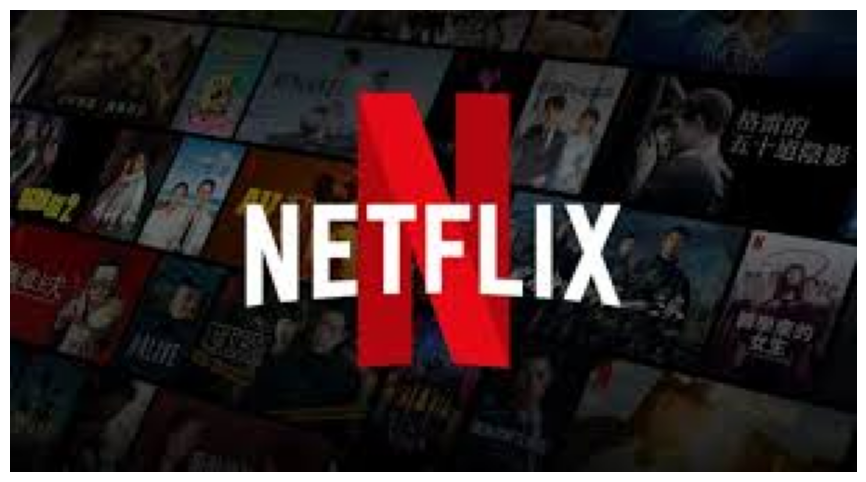

In [67]:
import matplotlib.image as mpimg

# Load image
img = mpimg.imread('/content/netimg.jpeg')

# Set figure size (width, height) in inches
plt.figure(figsize=(50, 6))  # Increase width here
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# **Netflix is known for its work in data science, AI, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly.**








In this project we are aimed to find out answers of these questions
* What is the most frequent genre of movies released on Netflix?

* What genres have the highest votes?

* What movie got the highest popularity? What's its genre?

* What movie got the lowest popularity? What's its genre?

* Which year has the most filmed movies?




# **[Dataset Link](https://github.com/TheiScale/YouTube-Video-Notes/tree/main/New%20Netflix%20Data%20Analysis%20Project%202025)**

In [2]:
# Importing pandas for data manipulation
import pandas as pd
# Importing numpy for numerical operations
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing seaborn for advanced data visualization
import seaborn as sns

In [6]:
# Reading the CSV file into a DataFrame
df = pd.read_csv('/content/mymoviedb.csv', lineterminator='\n')


In [13]:
# Getting the number of rows and columns in the DataFrame
df.shape

(9827, 9)

In [7]:
# Displaying the first 5 rows of the DataFrame
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
# Displaying summary info about the DataFrame (columns, data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [11]:
# Counting the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [15]:
# Generating statistical summary for numerical columns
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [18]:
# Generating summary statistics for all columns, including non-numerical ones
df.describe(include='all')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9827,9827,9827,9827.000000,9827.000000,9827.000000,9827,9827,9827
unique,5893,9513,9822,NaN,NaN,NaN,43,2337,9827
top,2022-03-10,Beauty and the Beast,Dr. Raichi is one of the only survivors of the...,NaN,NaN,NaN,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
freq,16,4,2,NaN,NaN,NaN,7570,466,1
mean,NaN,NaN,NaN,40.326088,1392.805536,6.439534,NaN,NaN,NaN
std,NaN,NaN,NaN,108.873998,2611.206907,1.129759,NaN,NaN,NaN
min,NaN,NaN,NaN,13.354000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.128500,146.000000,5.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.199000,444.000000,6.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.191500,1376.000000,7.100000,NaN,NaN,NaN


# **Exploration Summary**

* We have a dataframe consisting of 9827 rows and 9 columns.
* Our dataset looks a bit tidy with no NaNs nor duplicated values.

* Release_Date column needs to be casted into date time and to extract only the year value.

* Overview, Original_Language and Poster-Url wouldn’t be so useful during analysis, so we'll drop them.

* There is noticable outliers in Popularity column

* Vote_Average better be categorised for proper analysis.

* Genre column has comma seperated values and white spaces that needs to be handled and casted into category.

In [19]:
# Removing specified columns from the DataFrame
df.drop(columns=['Overview', 'Poster_Url', 'Original_Language'], axis=1, inplace=True)

In [20]:
# Converting 'Release_Date' column to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [23]:
# Printing the data type of the 'Release_Date' column
print(df['Release_Date'].dtypes)

datetime64[ns]


In [24]:
# Extracting the year from 'Release_Date' and storing it in a new column 'Release_Year'
df['Release_Year'] = df['Release_Date'].dt.year

In [27]:
# Checking the data type of the 'Release_Year' column
df['Release_Year'].dtypes

dtype('int32')

In [28]:
df.head() # first 5 rows

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


In [29]:
# Removing specified columns from the DataFrame
df.drop(columns=['Release_Date'], axis=1, inplace=True)

In [31]:
df.head()# first 5 rows

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


# **categorizing Vote_Average column**
We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using catigorize_col() function provided below.



In [33]:
# Function to categorize a numerical column into bins using quartiles
def catigorize_col(df, col, labels):
    # Defining bin edges based on column's quartile statistics
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    # Creating categorized column using the defined bins and labels
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [34]:
# Defining category labels
labels = ['not_popular', 'below_avg', 'average', 'popular']
# Categorizing the 'Vote_Average' column and updating the DataFrame
df = catigorize_col(df, 'Vote_Average', labels)
# Displaying the first 5 rows of the updated DataFrame
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [36]:
df['Vote_Average'].value_counts() # checking the values

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


# **We will split Genres into a list and then explode our dataset to have only one genre per row for each movie**

In [37]:
# Splitting the 'Genre' column values into lists
df['Genre'] = df['Genre'].apply(lambda x: x.split(', '))

# Exploding the lists in 'Genre' column into separate rows
df = df.explode('Genre').reset_index(drop=True)

# Displaying the first 5 rows of the updated DataFrame
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


In [38]:
# Checking the data type of the 'Genre' column
df['Genre'].dtypes

dtype('O')

In [41]:
df['Genre']=df['Genre'].astype('category')

In [43]:
# Checking the data type of the 'Genre' column
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [45]:
# Getting the number of unique values in each column
df.nunique()

,0
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,4
Genre,19
Release_Year,102


# **Data Visualisation**

In [47]:
sns.axes_style('whitegrid');

# **What is the most Frequent Genre of movies released on Netflix ??**

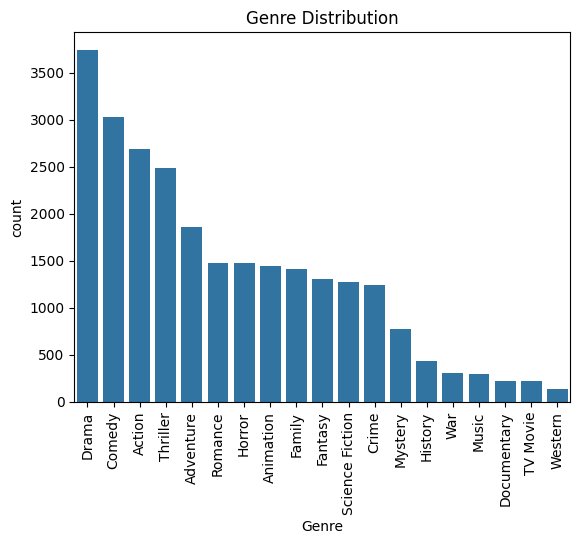

In [48]:
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.show()

* Drama is the most frequent genre.
* Comedy and Action follow as the next most common genres.
* Mid-level genres include Thriller, Adventure, and Romance.
* Less common genres are History, War, Music, Documentary, TV Movie, and Western.
* The distribution shows a strong preference for a few genres, indicating imbalance.

# **Which has highest number of votes in vote avg column ?**

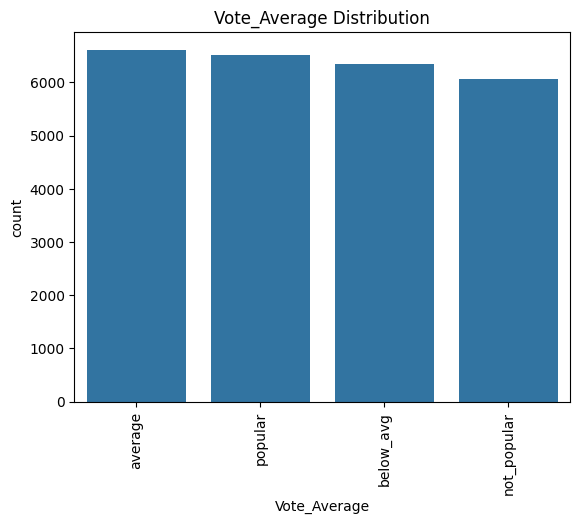

In [50]:
# Plotting the count of each category in 'Vote_Average'
sns.countplot(data=df, x='Vote_Average', order=df['Vote_Average'].value_counts().index)
# Rotating x-axis labels for better readability
plt.xticks(rotation=90)
# Setting the title of the plot
plt.title('Vote_Average Distribution')
# Displaying the plot
plt.show()


# **What movie got the highest popularity ?? and what is its genre ??**

In [52]:
# Displaying the row(s) with the highest 'Popularity' value
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


The movie which got the highest popularity is Spider-Man: No Way Home	with Genre as Action,Adventure,Science Fiction

# **What movie got the lowest popularity ?? and what is its genre ??**

In [57]:
# Displaying the row(s) with the highest 'Popularity' value
df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25787,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25788,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25789,The United States vs. Billie Holiday,13.354,152,average,History,2021
25790,Threads,13.354,186,popular,War,1984
25791,Threads,13.354,186,popular,Drama,1984
25792,Threads,13.354,186,popular,Science Fiction,1984


The movies which got the lowest popularity are "The United States vs. Billie Holiday"	and "Threads"	with Genre as Music,drama,History and War,Drama,Scicence Fiction respectively\

# **Which year has most filmmed movies**

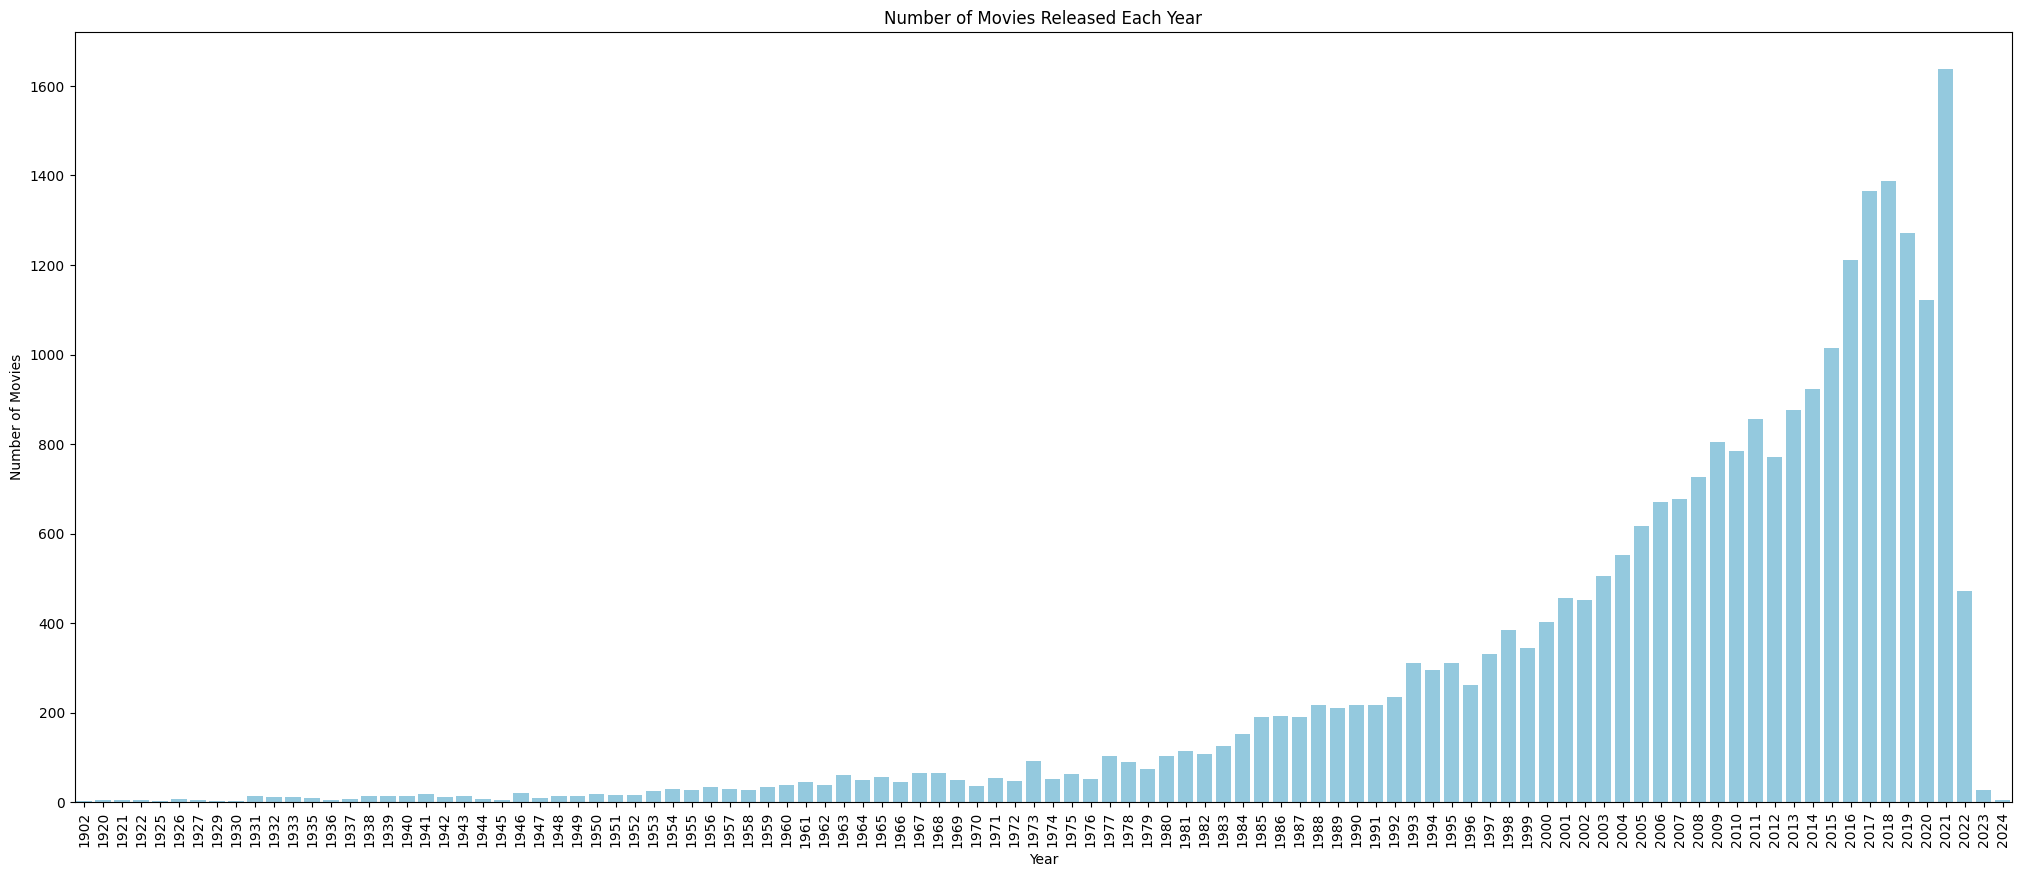

In [61]:
# Counting the number of movies released each year
movies_per_year = df['Release_Year'].value_counts().sort_index()

# Plotting the number of movies released per year
plt.figure(figsize=(25, 10))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='skyblue')

# Setting the title and labels
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


So the Year with maximum movies is 2021